# **Topic : Death rates based on Air Pollution**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
### ***Importing dataset***

In [4]:
#data = pd.read_csv('death_rate_based_on_air_pollution.csv')
data = pd.read_csv('death_rate_based_on_air_pollution.csv')
#C:/Users/SUHAIR/Desktop/DSA/death-rates-from-air-pollution.csv
data

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922
...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173


### *Checking null values*

In [5]:
data.isna().sum()

Entity                                               0
Code                                               980
Year                                                 0
Air pollution (total) (deaths per 100,000)           0
Indoor air pollution (deaths per 100,000)            0
Outdoor particulate matter (deaths per 100,000)      0
Outdoor ozone pollution (deaths per 100,000)         0
dtype: int64

### *The column code contains 980 null values and that column is not much useful so we have to drop that column*

In [6]:
data = data.drop(['Code'],axis=1)
data

,Entity,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,1994,287.162923,238.837177,45.594328,5.718922
...,...,...,...,...,...,...
6463,Zimbabwe,2013,143.850145,113.456097,27.589603,4.426291
6464,Zimbabwe,2014,138.200536,108.703566,26.760618,4.296971
6465,Zimbabwe,2015,132.752553,104.340506,25.715415,4.200907
6466,Zimbabwe,2016,128.692138,100.392287,25.643570,4.117173


### *Basic Details of dataset*

In [7]:
data.shape

(6468, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           6468 non-null   object 
 1   Year                                             6468 non-null   int64  
 2   Air pollution (total) (deaths per 100,000)       6468 non-null   float64
 3   Indoor air pollution (deaths per 100,000)        6468 non-null   float64
 4   Outdoor particulate matter (deaths per 100,000)  6468 non-null   float64
 5   Outdoor ozone pollution (deaths per 100,000)     6468 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 303.3+ KB


In [9]:
data.describe()

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,87.804083,50.481504,35.114982,3.370793
std,8.078372,57.845436,58.722565,18.207369,4.325445
min,1990.000000,8.401696,0.003859,7.542899,0.000000
25%,1996.750000,41.016114,2.002779,21.955108,1.302905
50%,2003.500000,72.653557,23.737851,30.977196,2.338684
75%,2010.250000,127.607177,90.138777,44.604181,3.515409
max,2017.000000,318.463253,293.509187,132.815726,37.356034


In [10]:
data.columns

Index(['Entity', 'Year', 'Air pollution (total) (deaths per 100,000)',
       'Indoor air pollution (deaths per 100,000)',
       'Outdoor particulate matter (deaths per 100,000)',
       'Outdoor ozone pollution (deaths per 100,000)'],
      dtype='object')

### *Finding outliers*

Text(0.5, 1.0, 'Box Plot of Air pollution (total) (deaths per 100,000)')

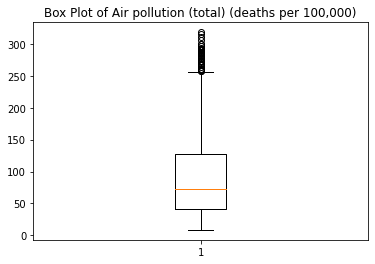

In [11]:
plt.boxplot(data['Air pollution (total) (deaths per 100,000)'])
plt.title('Box Plot of Air pollution (total) (deaths per 100,000)')

Text(0.5, 1.0, 'Box Plot of Indoor air pollution (deaths per 100,000)')

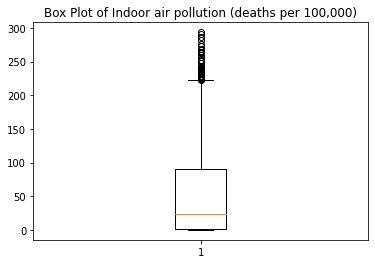

In [12]:
plt.boxplot(data['Indoor air pollution (deaths per 100,000)'])
plt.title('Box Plot of Indoor air pollution (deaths per 100,000)')

Text(0.5, 1.0, 'Box Plot of Outdoor particulate matter (deaths per 100,000)')

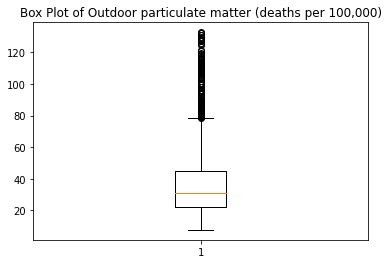

In [13]:
plt.boxplot(data['Outdoor particulate matter (deaths per 100,000)'])
plt.title('Box Plot of Outdoor particulate matter (deaths per 100,000)')

Text(0.5, 1.0, 'Box Plot of Outdoor ozone pollution (deaths per 100,000)')

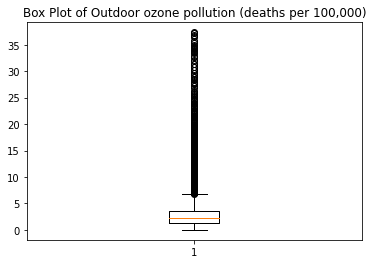

In [14]:
plt.boxplot(data['Outdoor ozone pollution (deaths per 100,000)'])
plt.title('Box Plot of Outdoor ozone pollution (deaths per 100,000)')

## ***Min-Max Scaling***

In [16]:
from sklearn import preprocessing

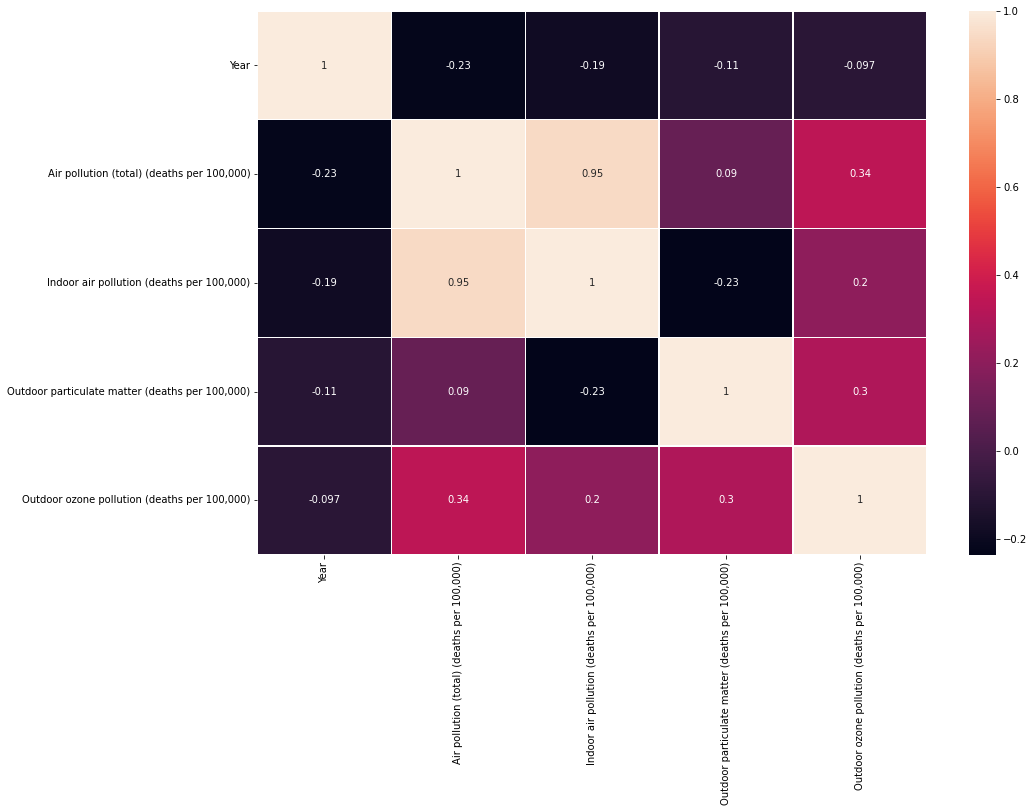

In [17]:
corrmet = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmet,annot=True,linewidth=.2)

In [18]:
y = data['Air pollution (total) (deaths per 100,000)']
x = data.drop(['Entity', 'Year', 'Air pollution (total) (deaths per 100,000)'],axis=1)

In [19]:
x.describe()

,"Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
count,6468.000000,6468.000000,6468.000000
mean,50.481504,35.114982,3.370793
std,58.722565,18.207369,4.325445
min,0.003859,7.542899,0.000000
25%,2.002779,21.955108,1.302905
50%,23.737851,30.977196,2.338684
75%,90.138777,44.604181,3.515409
max,293.509187,132.815726,37.356034


In [20]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2
0,0.852997,0.310552,0.150349
1,0.826463,0.307257,0.150015
2,0.790582,0.292968,0.150225
3,0.789234,0.294535,0.151388
4,0.813727,0.303748,0.153092
...,...,...,...
6463,0.386542,0.160024,0.118489
6464,0.370350,0.153407,0.115027
6465,0.355485,0.145064,0.112456
6466,0.342033,0.144490,0.110214


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE is : ',mean_squared_error(y_test,prediction))
print('R squared value is : ',r2_score(y_test,prediction))


MSE is :  0.09854657500947242
R squared value is :  0.9999703144084614


In [23]:
entity_df = data.groupby('Entity').mean().sort_values('Air pollution (total) (deaths per 100,000)', ascending=False)
entity_df['Entity'] = entity_df.index
entity_df

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Entity
Entity,,,,,,
Papua New Guinea,2003.5,285.494328,258.717975,26.657853,0.194349,Papua New Guinea
Afghanistan,2003.5,252.842551,203.967377,45.979634,5.797506,Afghanistan
Oceania,2003.5,225.706140,197.166775,28.363715,0.258772,Oceania
Central African Republic,2003.5,223.826758,181.785495,38.838389,6.286493,Central African Republic
Solomon Islands,2003.5,218.664031,199.800174,18.840167,0.039209,Solomon Islands
...,...,...,...,...,...,...
Japan,2003.5,17.182493,0.086986,15.752146,1.623360,Japan
Finland,2003.5,16.630969,0.573122,15.284359,0.862992,Finland
Iceland,2003.5,16.506321,0.480580,14.610092,1.596746,Iceland


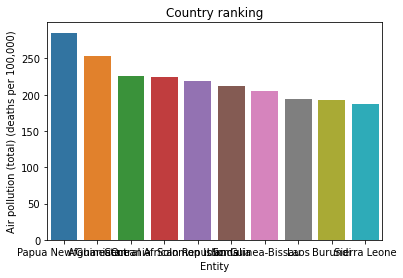

In [24]:
sns.barplot(x="Entity", y="Air pollution (total) (deaths per 100,000)", data=entity_df.head(10))
plt.title("Country ranking")
plt.show()

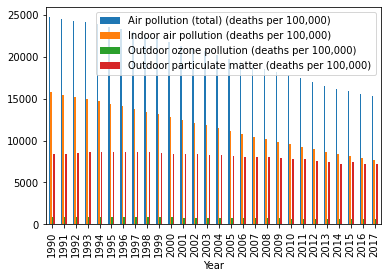

In [25]:
df = data.pivot_table(index = 'Year',  values = data.columns[2:], aggfunc = np.sum )
#df['Year'] = df.index
df.reset_index(level = 0, inplace = True)
df.plot(x = 'Year', kind = 'bar' )

In [26]:
df.columns

Index(['Year', 'Air pollution (total) (deaths per 100,000)',
       'Indoor air pollution (deaths per 100,000)',
       'Outdoor ozone pollution (deaths per 100,000)',
       'Outdoor particulate matter (deaths per 100,000)'],
      dtype='object')

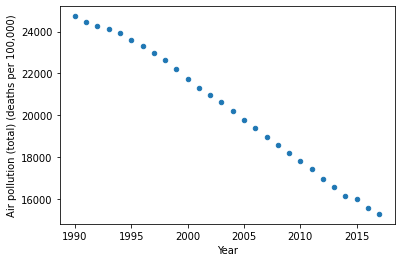

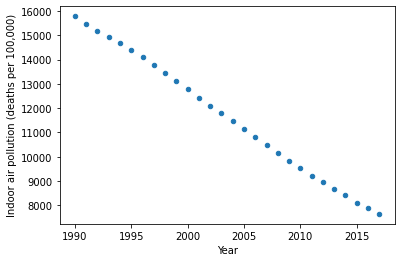

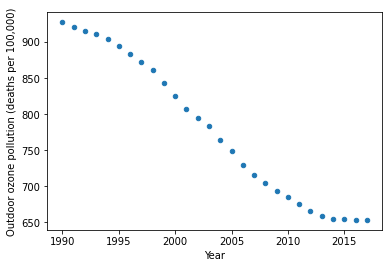

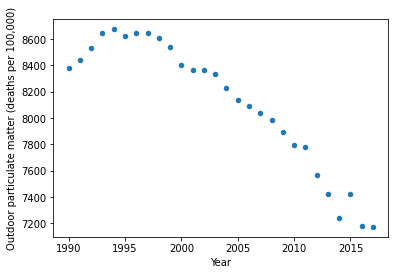

In [27]:
#Confirming the relationship b/w Year, deaths due to different kind of pollutions
df.plot(x = 'Year', y = df.columns[1], kind = 'scatter' )
df.plot(x = 'Year', y = df.columns[2], kind = 'scatter' )
df.plot(x = 'Year', y = df.columns[3], kind = 'scatter' )
df.plot(x = 'Year', y = df.columns[4], kind = 'scatter')

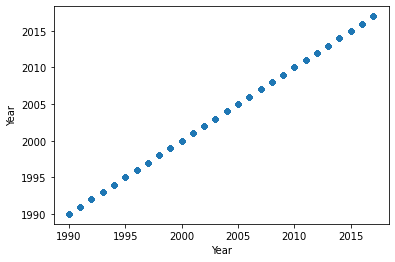

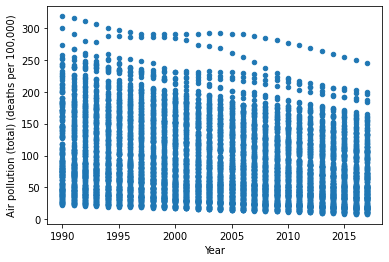

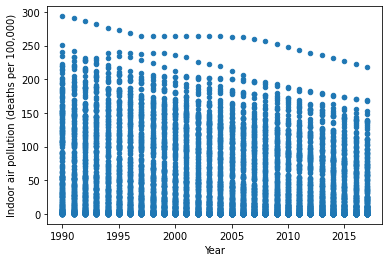

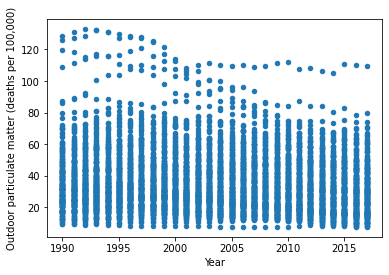

In [28]:
#Confirming the relationship b/w Year, deaths due to different kind of pollutions
data.plot(x = 'Year', y = data.columns[1], kind = 'scatter' )
data.plot(x = 'Year', y = data.columns[2], kind = 'scatter' )
data.plot(x = 'Year', y = data.columns[3], kind = 'scatter' )
data.plot(x = 'Year', y = data.columns[4], kind = 'scatter') 

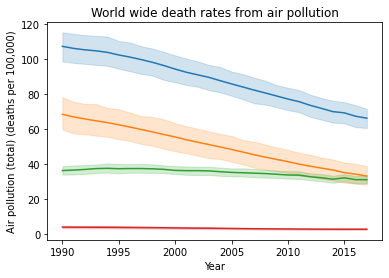

In [29]:
fig = sns.lineplot(x="Year", y="Air pollution (total) (deaths per 100,000)", data=data)
fig = sns.lineplot(x="Year", y="Indoor air pollution (deaths per 100,000)", data=data)
fig = sns.lineplot(x="Year", y="Outdoor particulate matter (deaths per 100,000)", data=data)
fig = sns.lineplot(x="Year", y="Outdoor ozone pollution (deaths per 100,000)", data=data)

plt.title("World wide death rates from air pollution")
plt.show()

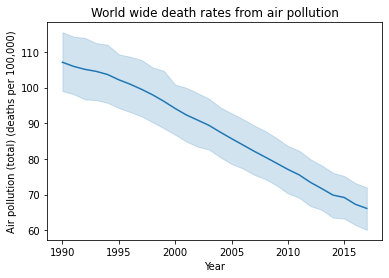

In [30]:
fig = sns.lineplot(x="Year", y="Air pollution (total) (deaths per 100,000)", data=data)

plt.title("World wide death rates from air pollution")
plt.show()

In [31]:
univar = data.groupby('Year').mean().sort_values('Air pollution (total) (deaths per 100,000)', ascending=False)
univar['Entity'] = univar.index
univar

,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Entity
Year,,,,,
1990,107.089841,68.312194,36.261170,4.015773,1990
1991,105.921658,66.869724,36.545388,3.984672,1991
1992,105.099761,65.680723,36.913712,3.964914,1992
1993,104.530294,64.615918,37.406590,3.946316,1993
1994,103.658924,63.614777,37.545409,3.914225,1994
1995,102.178770,62.375173,37.318275,3.873288,1995
1996,100.949738,61.072006,37.417970,3.824122,1996
1997,99.531074,59.679681,37.416956,3.776676,1997
1998,97.961221,58.288431,37.262728,3.727547,1998


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

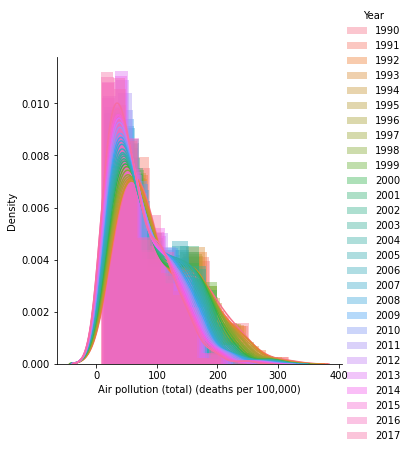

In [32]:
sns.FacetGrid(data,hue="Year",height=5).map(sns.distplot,"Air pollution (total) (deaths per 100,000)").add_legend(); 
plt.show();


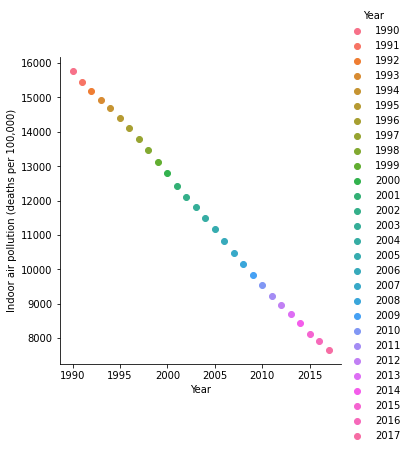

In [33]:
sns.FacetGrid(df,hue="Year",height=5).map(plt.scatter,"Year","Indoor air pollution (deaths per 100,000)").add_legend(); 

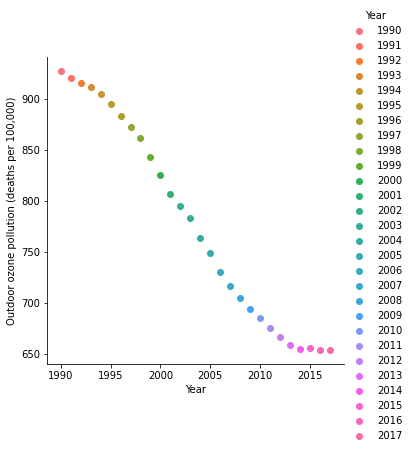

In [34]:
sns.FacetGrid(df,hue="Year",height=5).map(plt.scatter,"Year","Outdoor ozone pollution (deaths per 100,000)").add_legend(); 


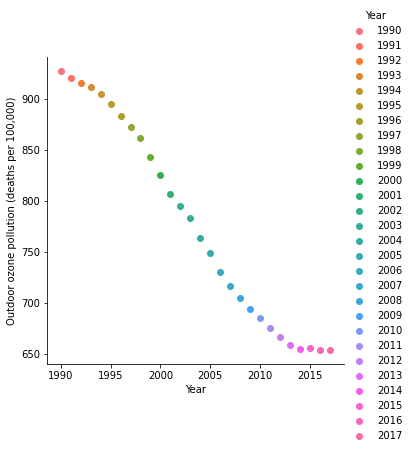

In [35]:
sns.FacetGrid(df,hue="Year",height=5).map(plt.scatter,"Year","Outdoor ozone pollution (deaths per 100,000)").add_legend(); 

#Modeling 

In [36]:
data.head()

,Entity,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,1994,287.162923,238.837177,45.594328,5.718922


In [37]:
data.columns

Index(['Entity', 'Year', 'Air pollution (total) (deaths per 100,000)',
       'Indoor air pollution (deaths per 100,000)',
       'Outdoor particulate matter (deaths per 100,000)',
       'Outdoor ozone pollution (deaths per 100,000)'],
      dtype='object')

In [38]:
data.shape

(6468, 6)

In [39]:
y = data['Year']
x = data.drop(['Entity', 'Year', 'Air pollution (total) (deaths per 100,000)'],axis=1)

In [40]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

In [41]:
#Model 1 :Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [43]:
print("Accuracy is:",accuracy_score(y_test,y_pred) )
print("Precision_score is:",precision_score(y_test,y_pred,pos_label='positive',average='micro') )
print("Recall_score:",recall_score(y_test,y_pred,pos_label='positive',average='micro') )
print("f1_score is:",f1_score(y_test,y_pred,pos_label='positive',average='micro') )

Accuracy is: 0.03525046382189239
Precision_score is: 0.03525046382189239
Recall_score: 0.03525046382189239
f1_score is: 0.03525046382189239


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [44]:
y_test.value_counts()

2001    72
2000    68
2017    65
2013    64
2011    63
1992    63
2009    62
1991    61
2005    61
1998    61
1996    60
2008    60
2014    59
2006    59
1997    59
1999    58
2015    58
2002    56
1990    53
2016    53
2004    53
2010    53
2012    53
1994    51
2007    50
1995    48
1993    47
2003    47
Name: Year, dtype: int64

In [45]:
confusion_matrix(y_test,y_pred)

array([[ 1, 13,  3,  9,  3,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  8,  0,  0,  1,  0,  0,  0,  0,  3, 10,  0],
       [ 1, 10,  1,  8,  3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  7,  0,  0,  1,  0,  8,  0,  0,  3, 14,  0],
       [ 3, 11,  2, 10,  2,  3,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0, 10,  0,  0,  1,  0,  5,  0,  0,  2, 13,  0],
       [ 2, 11,  2,  4,  3,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  5,  0,  0,  1,  0,  7,  0,  0,  1,  7,  0],
       [ 5,  9,  3,  4,  4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  6,  0,  0,  0,  0,  8,  0,  0,  2,  7,  0],
       [ 2, 15,  1,  7,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  5,  0,  0,  1,  0,  3,  0,  0,  2,  8,  0],
       [ 1, 14,  0,  6,  3,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  7,  0,  0,  1,  0,  3,  0,  0,  5, 16,  0],
       [ 3,  8,  1,  9,  4,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  9,  0,  0,  

In [46]:
#model 2: KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
y_pred = knnmodel.predict(x_test)

In [47]:
print("Accuracy is:",knnmodel.score(x_test,y_pred))
print("f1_score is:",f1_score(y_test,y_pred,pos_label='positive',average='micro') )

Accuracy is: 1.0
f1_score is: 0.023500309214594926


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [48]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 5, 22,  3,  2,  3,  2,  4,  1,  2,  2,  1,  1,  1,  2,  0,  0,
         0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [27,  2, 13,  3,  2,  4,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,
         1,  0,  1,  1,  0,  0,  2,  0,  1,  0,  0,  0],
       [22, 21,  3,  6,  4,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,
         1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1],
       [12,  4, 13,  2, 14,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [12, 11,  6,  7,  0, 11,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 7,  4,  5,  4, 10,  1,  7,  0,  1,  2,  1,  2,  1,  0,  0,  0,
         1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 6,  2,  6,  7,  8, 14,  1,  4,  2,  4,  1,  1,  0,  0,  1,  0,
         1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 5,  3, 10, 10,  6,  7,  7,  3,  4,  2,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  

#6 fine-tuning Models

In [49]:
from sklearn.model_selection import cross_val_score
all_model = [LogisticRegression(), KNeighborsClassifier()]

In [50]:
recall = []
accuracy = []

for model in all_model:
    cv = cross_val_score(model, x_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)

    cv = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10).mean()
    accuracy.append(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 

In [51]:
model = ['LogisticRegression', 'KNeighborsClassifier']

score = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Recall': recall})
score.style.background_gradient(high=1,axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Model,Accuracy,Recall
0,LogisticRegression,0.037517,nan
1,KNeighborsClassifier,0.025354,nan
